# 타이타닉 생존자 예측을 위한 EDA

데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import seaborn as sns
df = sns.load_dataset("titanic") # Pandas DataFrame을 반환해줌
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
# TODO: Pandas 경고는 수정해야 됨
# 원본 데이터는 항상 보존되어야 한다!
#df["age"].fillna(df["age"].mean(), inplace=True)
#df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["age"] = df["age"].fillna(df["age"].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

## 생존자 현황

In [8]:
survived_count = df["survived"].value_counts()
survived_rate = df["survived"].mean()
print(f"생존자: {survived_count[1]}명")
print(f"사망자: {survived_count[0]}명")
print(f"생존율: {survived_rate:.2%}")

생존자: 342명
사망자: 549명
생존율: 38.38%


In [9]:
# crossTab : 매우 유용!!!!!
pd.crosstab(df["sex"], df["survived"]) # Pandas의 약속: x축은 무족건 index로 깐다는 전제!

survived,0,1
sex,,
female,81,233
male,468,109


<Axes: xlabel='sex'>

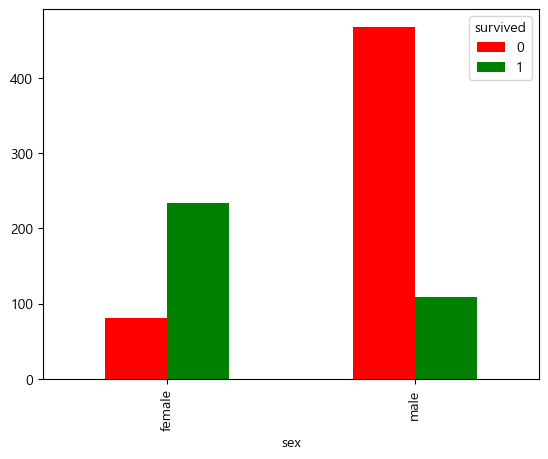

In [10]:
gender_survival_counts = pd.crosstab(df["sex"], df["survived"]) # Pandas의 약속: x축은 무족건 index로 깐다는 전제!
gender_survival_counts.plot(kind="bar", color=["red", "green"])

<Axes: xlabel='sex', ylabel='count'>

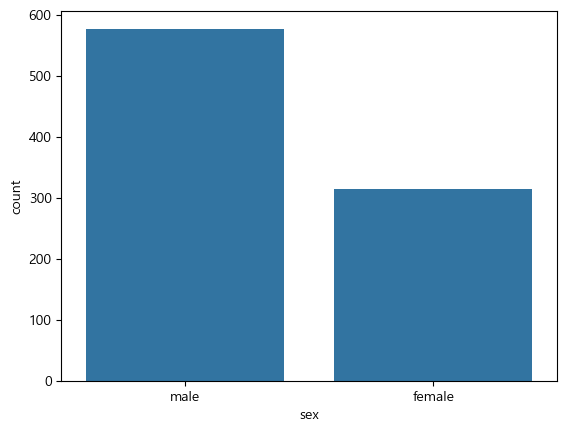

In [11]:
sns.countplot(data=df, x="sex")

<Axes: xlabel='sex', ylabel='count'>

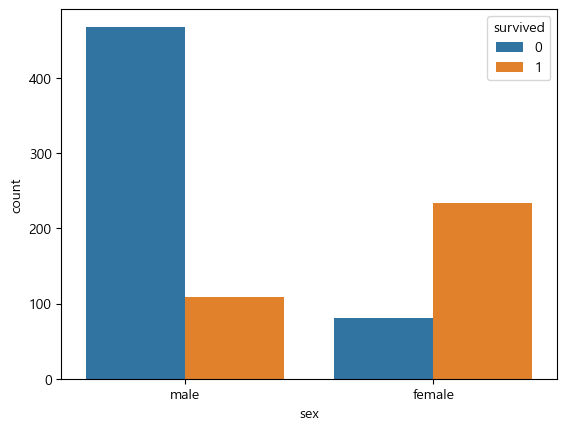

In [12]:
# sns.countplot(data=df, x="sex", hue="survived", palette=["red", "green"])
sns.countplot(data=df, x="sex", hue="survived") # sex를 보여주는데 survived를 기준으로 컬러를 나눠서 보여줘!

## 1. 성별에 따른 생존률 분석

In [13]:
pd.DataFrame(df.groupby("sex")["survived"].mean())

,survived
sex,
female,0.742038
male,0.188908


In [14]:
df.groupby("sex")["survived"].mean().reset_index()

,sex,survived
0,female,0.742038
1,male,0.188908


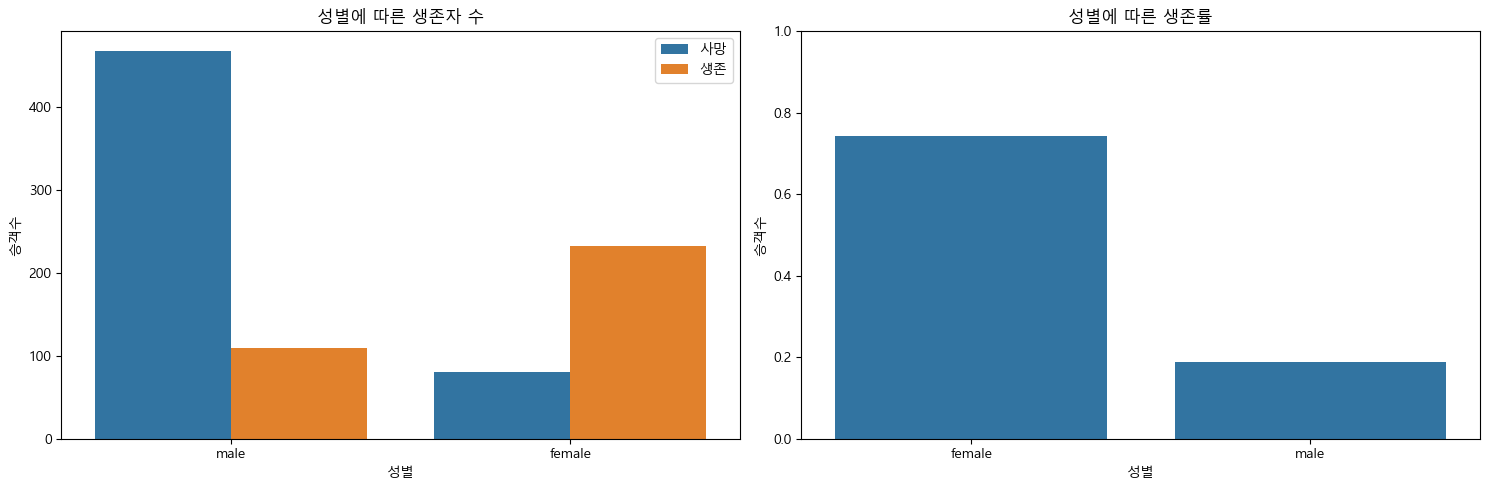

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="sex", hue="survived", ax=axes[0])
axes[0].set_title("성별에 따른 생존자 수")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("승객수")
axes[0].legend(labels=["사망", "생존"])

#성별 생존율! => 항상 수와 비율은 같이 가야한다!
#df.groupby("sex")["survived"].mean().reset_index()
#sns.barplot(data=df.groupby("sex")["survived"].mean().reset_index(), x="sex", y="survived", ax=axes[1], hue="survived", palette=["lightblue", "pink"])
#sns.barplot(data=pd.DataFrame(df.groupby("sex")["survived"].mean()), x="sex", y="survived", ax=axes[1])
sns.barplot(data=df.groupby("sex")["survived"].mean().reset_index(), x="sex", y="survived", ax=axes[1])
axes[1].set_title("성별에 따른 생존률")
axes[1].set_xlabel("성별")
axes[1].set_ylabel("승객수")
axes[1].set_ylim(0,1)

plt.tight_layout()
plt.show() # 메모리를 아끼자!

## 2. 승객 등급에 따른 생존율
- 등급별 생존자 수
- 등급별 생존율
- 등급과 성별 교차표

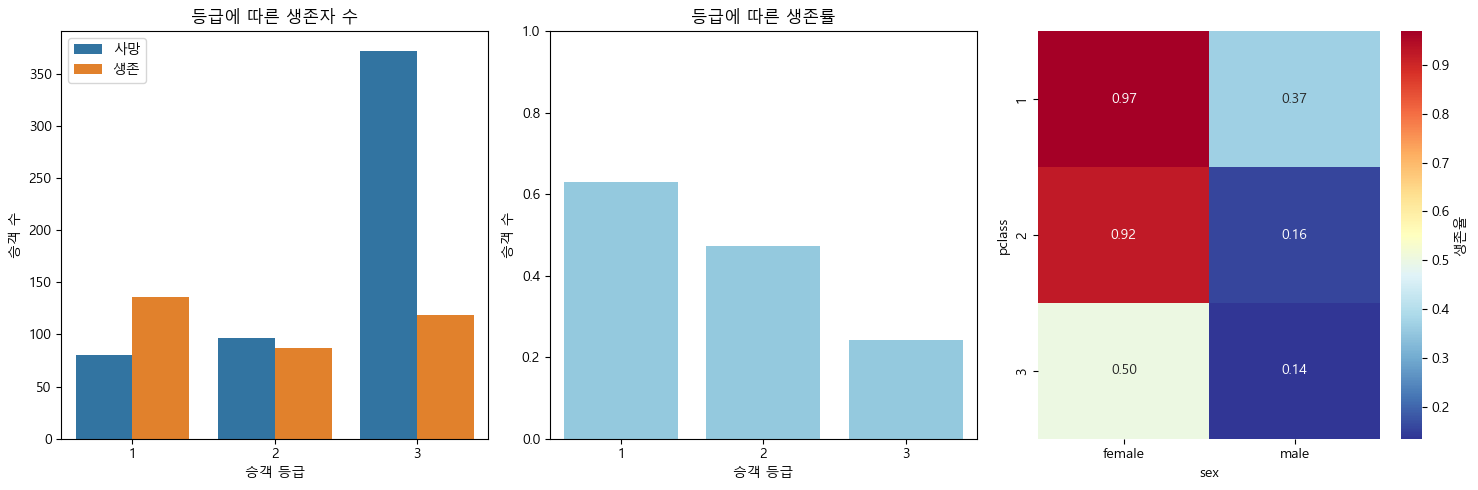

In [33]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# 등급별 생존자수
sns.countplot(data=df, x="pclass", hue="survived", ax=axes[0])
axes[0].set_title("등급에 따른 생존자 수")
axes[0].set_xlabel("승객 등급")
axes[0].set_ylabel("승객 수")
axes[0].legend(labels=["사망", "생존"])

# 등급별 생존률
sns.barplot(data=df.groupby("pclass")["survived"].mean().reset_index(), x="pclass", y="survived", ax=axes[1], color="skyblue")
axes[1].set_title("등급에 따른 생존률")
axes[1].set_xlabel("승객 등급")
axes[1].set_ylabel("승객 수")
axes[1].set_ylim(0,1)

# 교차 히트맵 : 색의 농도에 따라서
cross_tab = pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean")
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="RdYlBu_r", cbar_kws={"label":"생존율"}, ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
#### 새로운 데이터 만들기
#### pivot과 melt는 매우 중요!!!!!
#### pivot: pivot -> 옆으로 길게 만든다
#### melt: -> 아래로 길게 만든다
#### crosstab: 범주형 변수(A,B,C,D,E)를 기준으로


#### tidy data

In [27]:
# pclass 기준으로 성별을 계산해서 보여줘!
pd.crosstab(df["pclass"], df["sex"])

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


In [28]:
# pclass 기준으로 성별을 계산해서 보여줘!
pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean") # ValueError: values cannot be used without an aggfunc. aggfunc 집계함수

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [35]:
df["age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

## 3. 나이에 따른 생존율 분석
- 성별과 나이
- 전체 나이 분포
- 그룹별
- 생존 여부에 따른 나이 분포

C:\Users\user\AppData\Local\Temp\ipykernel_4040\793992176.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=df.groupby("age_group")["survived"].mean().reset_index(), x="age_group", y="survived", ax=axes[1,0], color="skyblue")


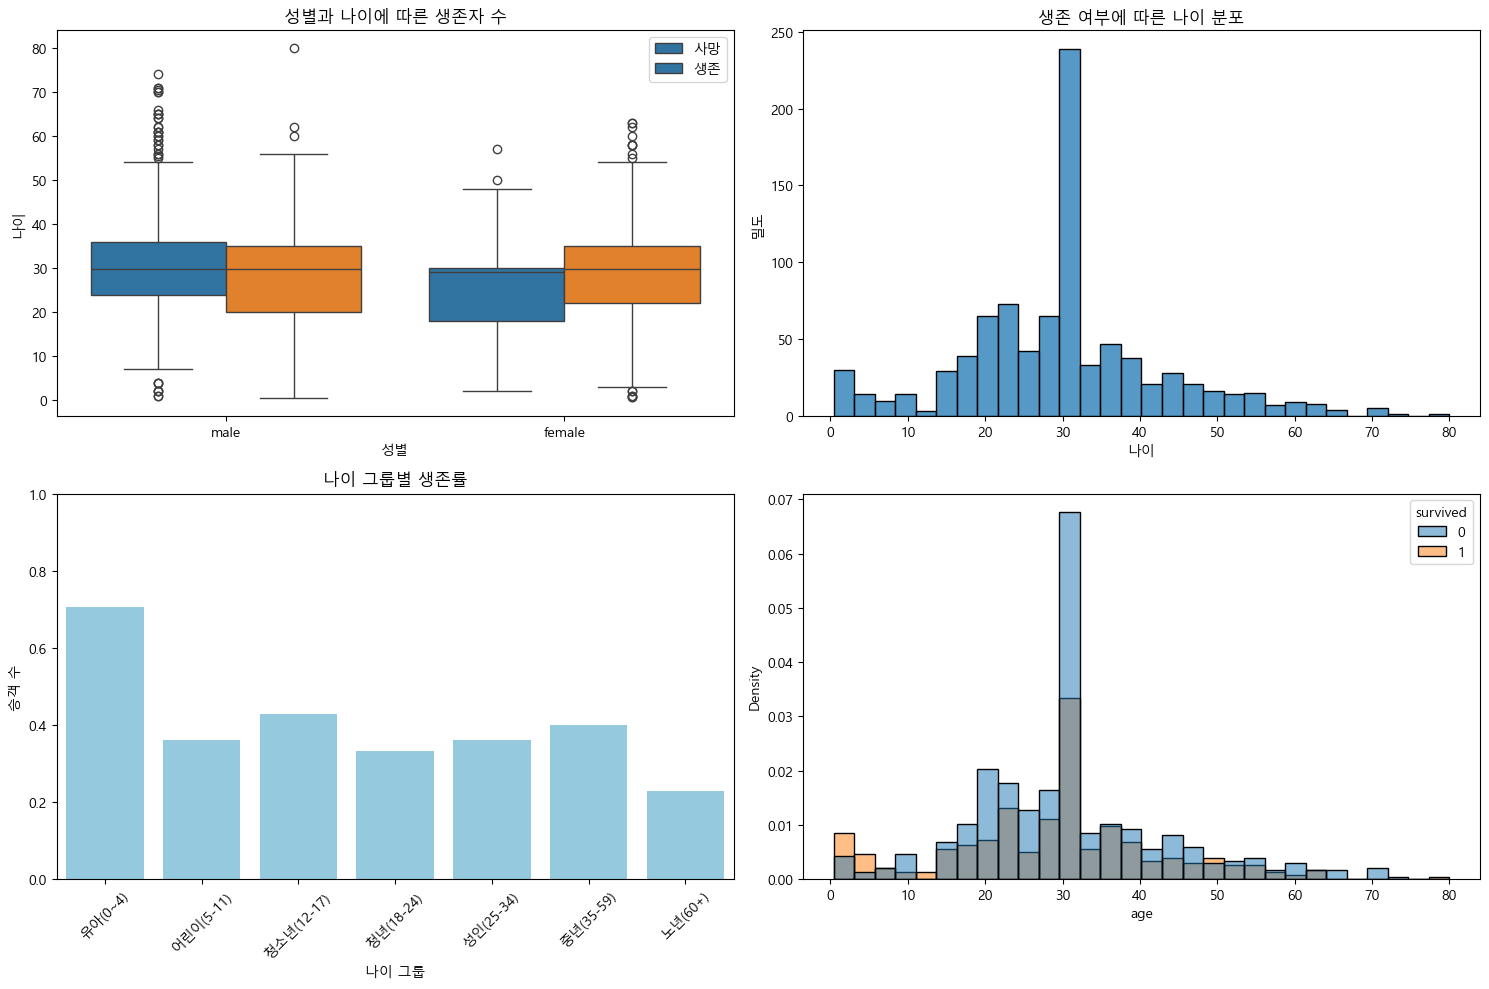

In [ ]:
# seabord 사이트 > gallery 참조
# boxplot
fig, axes = plt.subplots(2,2, figsize=(15,10))

# 성별과 나이에 따른 생존자 수 =================================
sns.boxplot(data=df, x="sex", y="age", hue="survived", ax=axes[0,0])
axes[0,0].set_title("성별과 나이에 따른 생존자 수")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망", "생존"])


# 전체 나이 분포 > 히스토그램 =================================
sns.histplot(data=df, x="age", ax=axes[0,1]) # age별로 개수 세아려줌
axes[0,1].set_title("전체 승객 나이")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("인원수")


# 나이 그룹별 생존률 =================================
# 유아(0~4)
# 어린이(5-11)
# 청소년(12-17)
# 청년(18-24)
# 성인(25-34)
# 중년(35-59)
# 노년(60+)

labels = ["유아(0~4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)", "성인(25-34)", "중년(35-59)", "노년(60+)"]
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
df["age_group"] = pd.cut(df["age"], bins, labels=labels)

sns.barplot(data=df.groupby("age_group", observed=True)["survived"].mean().reset_index(), x="age_group", y="survived", ax=axes[1,0], color="skyblue")
axes[1,0].set_title("나이 그룹별 생존률")
axes[1,0].set_xlabel("나이 그룹")
axes[1,0].set_ylabel("승객 수")
axes[1,0].tick_params(axis="x", rotation=45)
axes[1,0].set_ylim(0,1)

# 생존 여부에 따른 나이 분포 =================================
sns.histplot(data=df, x="age", hue="survived", stat="density", ax=axes[1,1]) # age별로 개수 세아려줌
axes[0,1].set_title("생존 여부에 따른 나이 분포")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("밀도")

plt.tight_layout()
plt.show()


In [45]:
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
pd.cut(df["age"], bins, labels=labels)

0      청년(18-24)
1      중년(35-59)
2      성인(25-34)
3      성인(25-34)
4      성인(25-34)
         ...    
886    성인(25-34)
887    청년(18-24)
888    성인(25-34)
889    성인(25-34)
890    성인(25-34)
Name: age, Length: 891, dtype: category
Categories (7, object): ['유아(0~4)' < '어린이(5-11)' < '청소년(12-17)' < '청년(18-24)' < '성인(25-34)' < '중년(35-59)' < '노년(60+)']

In [44]:
labels = ["유아(0~4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)", "성인(25-34)", "중년(35-59)", "노년(60+)"]
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
pd.cut(df["age"], bins, labels=labels)

0      청년(18-24)
1      중년(35-59)
2      성인(25-34)
3      성인(25-34)
4      성인(25-34)
         ...    
886    성인(25-34)
887    청년(18-24)
888    성인(25-34)
889    성인(25-34)
890    성인(25-34)
Name: age, Length: 891, dtype: category
Categories (7, object): ['유아(0~4)' < '어린이(5-11)' < '청소년(12-17)' < '청년(18-24)' < '성인(25-34)' < '중년(35-59)' < '노년(60+)']

In [ ]:
# Pandas로 바꿔보기!
fig, axes = plt.subplots(2,2, figsize=(15,10))

# 성별과 나이에 따른 생존자 수 =================================
sns.boxplot(data=df, x="sex", y="age", hue="survived", ax=axes[0,0])
axes[0,0].set_title("성별과 나이에 따른 생존자 수")
axes[0,0].set_xlabel("성별")
axes[0,0].set_ylabel("나이")
axes[0,0].legend(labels=["사망", "생존"])


# 전체 나이 분포 > 히스토그램 =================================
sns.histplot(data=df, x="age", ax=axes[0,1])
#df["age"].plot()
axes[0,1].set_title("전체 승객 나이")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("인원수")


# 나이 그룹별 생존률 =================================
labels = ["유아(0~4)", "어린이(5-11)", "청소년(12-17)", "청년(18-24)", "성인(25-34)", "중년(35-59)", "노년(60+)"]
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
df["age_group"] = pd.cut(df["age"], bins, labels=labels)

sns.barplot(data=df.groupby("age_group", observed=True)["survived"].mean().reset_index(), x="age_group", y="survived", ax=axes[1,0], color="skyblue")
axes[1,0].set_title("나이 그룹별 생존률")
axes[1,0].set_xlabel("나이 그룹")
axes[1,0].set_ylabel("승객 수")
axes[1,0].tick_params(axis="x", rotation=45)
axes[1,0].set_ylim(0,1)

# 생존 여부에 따른 나이 분포 =================================
sns.histplot(data=df, x="age", hue="survived", stat="density", ax=axes[1,1]) # age별로 개수 세아려줌
axes[0,1].set_title("생존 여부에 따른 나이 분포")
axes[0,1].set_xlabel("나이")
axes[0,1].set_ylabel("밀도")

plt.tight_layout()
plt.show()


[수업 중 노트]
새로운 데이터(N) -> 
독립변인 : 성별(x1), 나이(x2), 등급(x3) 
생존여부 : y + alpha(오차)
방정식(1차 방정식, 선형대수) : a1*x1 + a2*x2 + a3*x3 + alpha(절편, 상수항, 여기선 오차) = y
방정식 어떠한 항이 미지수인것

y = a1*N1 + a2*N2 + a3*N3 + alpha(오차)
a1, a2, a3는 기울기, 기울기는 비율, x의 증가량에 따른 y의 증가량
N1, N2, N3는 미지수
=> 선형 대수

머신 러닝 전부 1차 방정식으로 -> 오로지 직선만

[머신 러닝 맛보기]
[생존자 예측]
a1*x1 + a2*x2 + a3*x3 = y, y > 0 이면 "생존"(으로 가정)

"머신러닝에서 x는 미지수가 아니라 무조건 상수(데이터가 주어지므로!)"
덧셈과 상수배로만 이루어져 있는 시스템을 선형성, 선형 대수
모든 대수는 선형 공간 이라는 집합계(선형계, 등등)
선형의 기울기는 미지수
=> 기울기로 모든 것을 결정한다!

머신러닝에서
x는 가중치, weight


[조각 지식]
편미분
행렬의 상수배

수학: 기하, 대수(집합과 연산이 주어짐-> {S, *} 항등식), 해석(항등식에 미지수를 넣어 방정식을, 해석을 위해 그래프를 그린다), 통계


(옛) O 데이터 -> 전처리(EDA) -> 보고서 (상관관계, 이해) -> __ -> 예측(1. 사람, 2. 수학, 3. 기계)